*italicized text*# Graph Data Analytics

In [1]:
#!conda install networkx --yes

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
G = nx.karate_club_graph()
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 34
Number of edges: 78


### Calculate page rank by using simple degree centrality

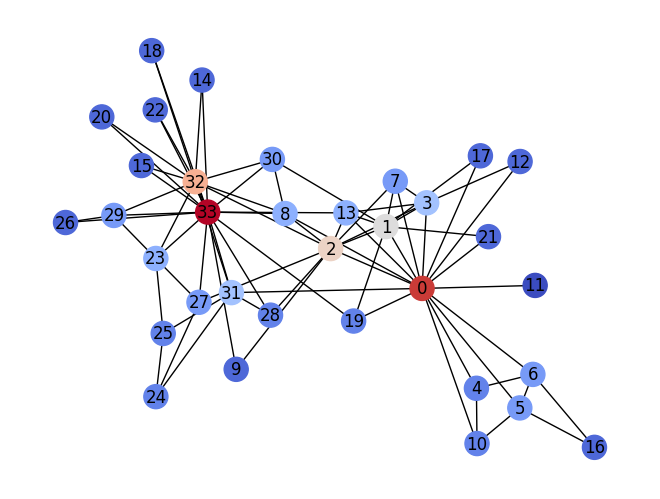

In [4]:
def simple_pagerank(G):
    p = np.array([G.degree(index) for node, index in enumerate(G.nodes())])
    return p

values = simple_pagerank(G)
nx.draw(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

### Calculate page rank by updating the centrality of each node with the iteration

(34,)


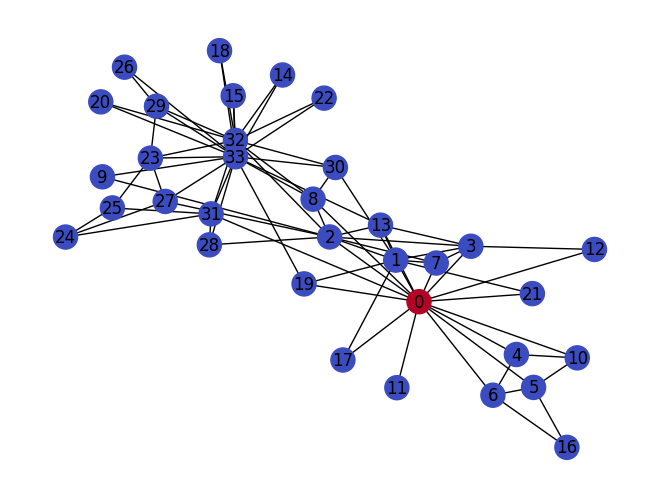

In [5]:
def pagerank_centrality(G, iter=100):
    p = np.array([1 for i in list(G.nodes())])
    print(p.shape)
    for k in range(iter):
        for i in G.nodes():
            for j in G.nodes():
                # update the centrality
                try:
                    p[i] += int(G.number_of_edges(i, j) * p[j] / G.degree[j])
                except:
                    pass

        norm = sum(p)
        p = p / norm
    return p


values = pagerank_centrality(G)
nx.draw(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

In [10]:
G = nx.read_edgelist('/content/gr0.California.edges.txt')
G.remove_nodes_from(list(nx.isolates(G)))
print("Name:", "")
print("Type:", G.__class__.__name__)
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Average degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())
G1 = G.subgraph(list(G.nodes())[100:150])
print("Name:", "")
print("Type:", G1.__class__.__name__)
print("Number of nodes:", G1.number_of_nodes())
print("Number of edges:", G1.number_of_edges())
print("Average degree:", sum(dict(G1.degree()).values()) / G1.number_of_nodes())

Name: 
Type: Graph
Number of nodes: 6175
Number of edges: 15969
Average degree: 5.172145748987854
Name: 
Type: Graph
Number of nodes: 50
Number of edges: 42
Average degree: 1.68


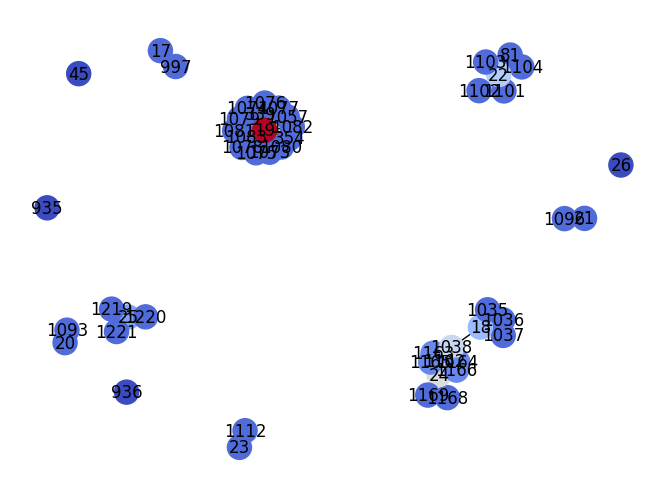

In [11]:
values = simple_pagerank(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

(50,)


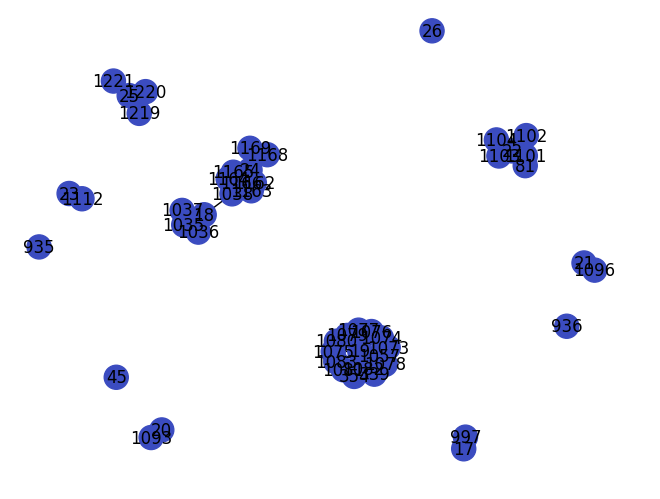

In [12]:
values = pagerank_centrality(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)